<a href="https://colab.research.google.com/github/Shaillucky/Weather-Image-Classification-Using-Keras/blob/main/DPhi_Weather__Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importing the library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
import os
import cv2
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
path = "/content/drive/MyDrive/"
files = os.listdir(path)
print(files)

['Getting started.pdf', 'Training_set.csv', 'Testing_set.csv', 'Colab Notebooks', 'penguine.jpeg', 'kaggle', 'Kaggle', 'weather.zip', 'test', 'train']


In [ ]:
labels = pd.read_csv("/content/drive/MyDrive/Training_set.csv") # Loading the labels

labels.head() # Will display the first five rows in the lables dataframe


,filename,label
0,Image_1.jpg,sunrise
1,Image_2.jpg,shine
2,Image_3.jpg,cloudy
3,Image_4.jpg,shine
4,Image_5.jpg,sunrise


In [ ]:
labels.tail() # Will display the last five rows in the labels dataframe

,filename,label
1043,Image_1044.jpg,foggy
1044,Image_1045.jpg,sunrise
1045,Image_1046.jpg,cloudy
1046,Image_1047.jpg,rainy
1047,Image_1048.jpg,sunrise


In [ ]:
labels.label.value_counts()

sunrise    245
cloudy     210
foggy      210
rainy      209
shine      174
Name: label, dtype: int64

In [ ]:
labels.isnull().sum()

filename    0
label       0
dtype: int64

In [ ]:
labels.shape

(1048, 2)

In [ ]:
classes = {'sunrise':0, 'foggy':1, 'cloudy':2, 'rainy':3, 'shine':4}

In [ ]:
dim1 = []
dim2 = []
for i in range(len(labels)):
  
  img= cv2.imread(path+"/train/"+labels.iloc[i, 0], 0)
  dim1.append(img.shape[0])
  dim2.append(img.shape[1])

In [ ]:
print(min(dim1))
print(min(dim2))

110
168


In [ ]:
x = []
y = []
for i in range(len(labels)):
  img = cv2.resize(cv2.imread(path+"/train/"+labels.iloc[i,0], 0),(110,110))
  x.append(img)
  y.append(classes[labels.iloc[i,1]])

In [ ]:
pd.Series(y).value_counts()

0    245
2    210
1    210
3    209
4    174
dtype: int64

In [ ]:
x[0].shape

(110, 110)

In [ ]:

print(type(x))
x = np.array(x)
y = np.array(y)
print(type(y))

<class 'list'>
<class 'numpy.ndarray'>


4


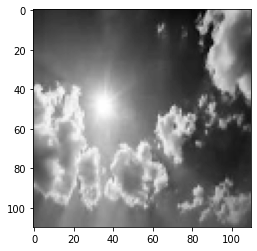

In [ ]:

plt.imshow(x[3], cmap="gray")
print(y[3])

In [ ]:
print(x.shape)

(1048, 110, 110)


In [ ]:
x_new = x.reshape(len(x), -1)
print(x_new.shape)
print(y.shape)

(1048, 12100)
(1048,)


In [ ]:
print(x.shape)
print(x.ndim)
print(x_new.ndim)


(1048, 110, 110)
3
2


In [ ]:
print(x_new.max())

255


In [ ]:
x_train = x_new/225
print(x_train.max())

1.1333333333333333


In [ ]:
print(x_train.shape)

(1048, 12100)


In [ ]:


model = keras.Sequential([
                          keras.layers.Dense(10000, input_shape=(12100,), activation='relu'),
                          keras.layers.Dense(5, activation='sigmoid')])


model.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y, epochs=20)

Epoch 1/20
33/33 [==============================] - 13s 367ms/step - loss: 3.0272 - accuracy: 0.3454
Epoch 2/20
33/33 [==============================] - 10s 298ms/step - loss: 1.2434 - accuracy: 0.4905
Epoch 3/20
33/33 [==============================] - 10s 291ms/step - loss: 1.1713 - accuracy: 0.5219
Epoch 4/20
33/33 [==============================] - 10s 290ms/step - loss: 1.1165 - accuracy: 0.5429
Epoch 5/20
33/33 [==============================] - 10s 290ms/step - loss: 1.0868 - accuracy: 0.5802
Epoch 6/20
33/33 [==============================] - 10s 291ms/step - loss: 1.0648 - accuracy: 0.5983
Epoch 7/20
33/33 [==============================] - 10s 290ms/step - loss: 1.0253 - accuracy: 0.5992
Epoch 8/20
33/33 [==============================] - 10s 303ms/step - loss: 0.9939 - accuracy: 0.6298
Epoch 9/20
33/33 [==============================] - 11s 326ms/step - loss: 0.9663 - accuracy: 0.6546
Epoch 10/20
33/33 [==============================] - 10s 300ms/step - loss: 0.9182 - accura

In [ ]:

model = keras.Sequential([keras.layers.Dense(10000, input_shape=(12100,),activation='relu'),
                          keras.layers.Dense(5, activation='sigmoid')])


model.compile(optimizer='SGD', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y, verbose=1, epochs=47)

Epoch 1/47
33/33 [==============================] - 9s 278ms/step - loss: 2.9737 - accuracy: 0.3817
Epoch 2/47
33/33 [==============================] - 9s 277ms/step - loss: 1.2365 - accuracy: 0.5086
Epoch 3/47
33/33 [==============================] - 9s 279ms/step - loss: 1.1575 - accuracy: 0.5267
Epoch 4/47
33/33 [==============================] - 9s 276ms/step - loss: 1.1333 - accuracy: 0.5639
Epoch 5/47
33/33 [==============================] - 9s 277ms/step - loss: 1.0787 - accuracy: 0.5935
Epoch 6/47
33/33 [==============================] - 9s 278ms/step - loss: 1.0368 - accuracy: 0.6069
Epoch 7/47
33/33 [==============================] - 9s 276ms/step - loss: 1.0635 - accuracy: 0.5897
Epoch 8/47
33/33 [==============================] - 9s 276ms/step - loss: 0.9806 - accuracy: 0.6441
Epoch 9/47
33/33 [==============================] - 9s 276ms/step - loss: 0.9726 - accuracy: 0.6288
Epoch 10/47
33/33 [==============================] - 9s 278ms/step - loss: 0.9311 - accuracy: 0.6603

In [ ]:
label_test = pd.read_csv("/content/drive/MyDrive/Testing_set.csv")
label_test.head()

,filename
0,Image_1.jpg
1,Image_2.jpg
2,Image_3.jpg
3,Image_4.jpg
4,Image_5.jpg


In [ ]:
label_test.shape

(450, 1)

In [ ]:
import cv2
x_test = []
for i in range(len(label_test)):
  img= cv2.resize(cv2.imread(path+"/test/"+label_test.iloc[i, 0], 0), (110, 110))
  x_test.append(img)

In [ ]:
print(type(x_test))
x_test = np.array(x_test)
print(type(x_test))


<class 'list'>
<class 'numpy.ndarray'>


In [ ]:
x_test_new = x_test.reshape(len(x_test), -1)
print(x_test_new.shape)

(450, 12100)


In [ ]:
print(x_test.shape)
print(x_test.ndim)
print(x_test_new.ndim)

(450, 110, 110)
3
2


In [ ]:
print(x_test_new.max())

255


In [ ]:
new_x_test = x_test_new/255
print(new_x_test.max())

1.0


In [ ]:

y_predicted = model.predict(new_x_test)
y_predicted[0]

array([0.9083667 , 0.08073476, 0.8547479 , 0.6340826 , 0.20176134],
      dtype=float32)

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:15]

[0, 0, 1, 3, 2, 3, 3, 1, 4, 2, 4, 0, 0, 0, 0]

In [ ]:
decode = {0:'sunrise', 1:'foggy', 2:'cloudy', 3:'rainy', 4:'shine'}

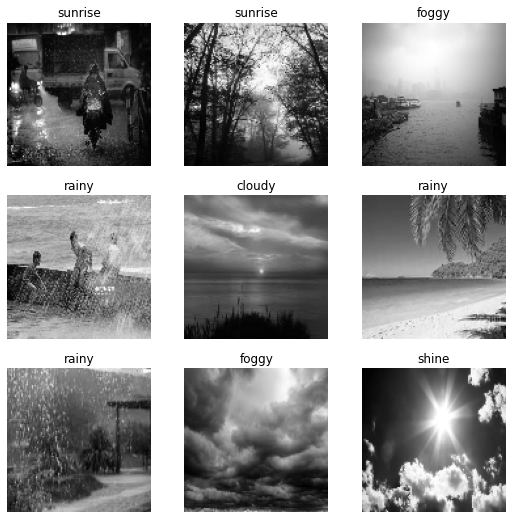

In [ ]:
plt.figure(figsize=(9, 9))
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(new_x_test[i].reshape(110, 110), cmap='gray')
  plt.title(decode[y_predicted_labels[i]])
  plt.axis('off')

In [ ]:
result = []
for i in range(len(label_test)):
  result.append(decode[y_predicted_labels[i]])

In [ ]:
res = pd.DataFrame(result)
res.columns = ["label"]

from google.colab import files
res.to_csv('submission.csv')
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>